## Imports and setup

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random

# Define the path to the data
data_path = '../data/raw/'
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')

# Class mapping from the CSV file (optional, if needed)
class_dict = pd.read_csv(os.path.join(data_path, 'class_dict.csv'))
print(class_dict)


               name    r    g    b
0        urban_land    0  255  255
1  agriculture_land  255  255    0
2         rangeland  255    0  255
3       forest_land    0  255    0
4             water    0    0  255
5       barren_land  255  255  255
6           unknown    0    0    0


In [11]:
def count_images_and_masks(data_dir):
    image_files = [f for f in os.listdir(data_dir) if f.endswith('_sat.jpg')]
    mask_files = [f for f in os.listdir(data_dir) if f.endswith('_mask.png')]
    print(f"Number of images: {len(image_files)}")
    print(f"Number of masks: {len(mask_files)}")

print("Training Data:")
count_images_and_masks(train_path)
print("\nValidation Data:")
count_images_and_masks(valid_path)


Training Data:
Number of images: 803
Number of masks: 803

Validation Data:
Number of images: 171
Number of masks: 0


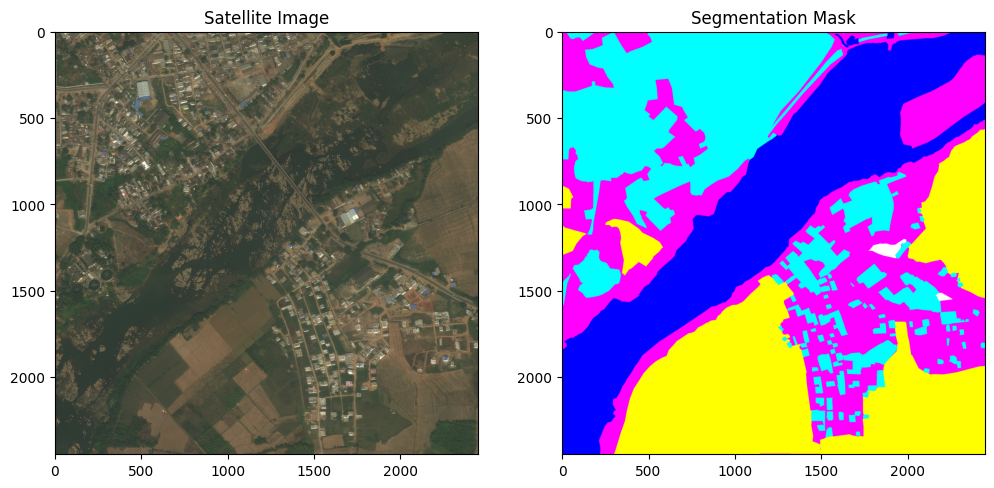

In [12]:
def show_image_and_mask(image_path, mask_path):
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title('Satellite Image')
    ax[1].imshow(mask)
    ax[1].set_title('Segmentation Mask')
    plt.show()

# Pick a random image from the training data
random_image = random.choice([f for f in os.listdir(train_path) if f.endswith('_sat.jpg')])
image_path = os.path.join(train_path, random_image)
mask_path = image_path.replace('_sat.jpg', '_mask.png')

show_image_and_mask(image_path, mask_path)


In [13]:
import numpy as np
from PIL import Image
from collections import Counter
import os

# Mapping RGB values to class names from class_dict.csv
CLASS_RGB_VALUES = {
    (0, 255, 255): 'urban_land',
    (255, 255, 0): 'agriculture_land',
    (255, 0, 255): 'rangeland',
    (0, 255, 0): 'forest_land',
    (0, 0, 255): 'water',
    (255, 255, 255): 'barren_land',
    (0, 0, 0): 'unknown'
}

# Function to analyze class distribution in a mask
def analyze_mask_classes(mask_path):
    mask = np.array(Image.open(mask_path))  # Load image as NumPy array
    mask = mask.reshape(-1, 3)  # Reshape to 2D array with RGB values in 3 columns
    unique_colors, counts = np.unique(mask, axis=0, return_counts=True)  # Count unique RGB values
    class_counts = {CLASS_RGB_VALUES.get(tuple(color), 'unknown'): count for color, count in zip(unique_colors, counts)}
    return class_counts

# Process only a subset of images (e.g., 5 images)
subset_image_files = [f for f in os.listdir(train_path) if f.endswith('_mask.png')][:5]

total_class_counts = Counter()

# Loop through the subset of mask files
for mask_file in subset_image_files:
    mask_path = os.path.join(train_path, mask_file)
    mask_class_counts = analyze_mask_classes(mask_path)
    total_class_counts.update(mask_class_counts)

# Print total class distribution across the subset of training set
print("Total class distribution across subset of training set:", total_class_counts)


Total class distribution across subset of training set: Counter({'agriculture_land': 14251351, 'forest_land': 7667642, 'rangeland': 3728796, 'barren_land': 1786938, 'water': 1276621, 'urban_land': 1252172})


In [14]:
def analyze_mask_classes_with_resize(mask_path):
    mask = Image.open(mask_path).resize((512, 512))  # Resize mask to 512x512
    mask = np.array(mask)
    mask = mask.reshape(-1, 3)
    unique_colors, counts = np.unique(mask, axis=0, return_counts=True)
    class_counts = {CLASS_RGB_VALUES.get(tuple(color), 'unknown'): count for color, count in zip(unique_colors, counts)}
    return class_counts


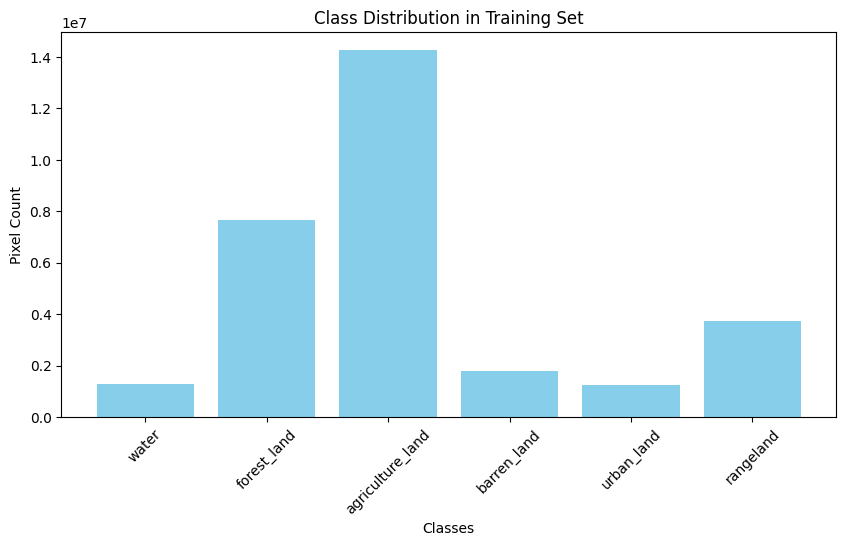

In [15]:
def plot_class_distribution(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Pixel Count')
    plt.title('Class Distribution in Training Set')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(total_class_counts)


In [16]:
def check_image_and_mask_size(image_path, mask_path):
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    print(f"Image size: {image.size}")
    print(f"Mask size: {mask.size}")

check_image_and_mask_size(image_path, mask_path)


Image size: (2448, 2448)
Mask size: (2448, 2448)


In [17]:
def check_mask_binarization(mask_path):
    mask = np.array(Image.open(mask_path))
    unique_colors = np.unique(mask.reshape(-1, 3), axis=0)
    print(f"Unique RGB values in mask: {unique_colors}")

check_mask_binarization(mask_path)

Unique RGB values in mask: [[  0   0 255]
 [  0 255 255]
 [255   0 255]
 [255 255   0]
 [255 255 255]]


In [18]:
def check_image_and_mask_size(image_path, mask_path):
    image = Image.open(image_path)
    mask = Image.open(mask_path)

    print(f"Image size: {image.size}")
    print(f"Mask size: {mask.size}")

check_image_and_mask_size(image_path, mask_path)


Image size: (2448, 2448)
Mask size: (2448, 2448)


In [19]:
def check_mask_binarization(mask_path):
    mask = np.array(Image.open(mask_path))
    unique_colors = np.unique(mask.reshape(-1, 3), axis=0)
    print(f"Unique RGB values in mask: {unique_colors}")

check_mask_binarization(mask_path)


Unique RGB values in mask: [[  0   0 255]
 [  0 255 255]
 [255   0 255]
 [255 255   0]
 [255 255 255]]
